# Decision tree

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import cv2

In [31]:
data = pd.read_csv("DTree.csv")
data

,Ob-Havo,Temp,Namlik,Shamol,Oyinchilar
0,Yomg'ir,Issiq,Yuqori,False,25
1,Yomg'ir,Issiq,Yuqori,True,30
2,Bulutli,Issiq,Yuqori,False,46
3,Quyoshli,Yaxshi,Yuqori,False,45
4,Quyoshli,Salqin,Normal,False,52
5,Quyoshli,Salqin,Normal,True,23
6,Bulutli,Salqin,Normal,True,43
7,Yomg'ir,Yaxshi,Yuqori,False,35
8,Yomg'ir,Salqin,Normal,False,38
9,Quyoshli,Yaxshi,Normal,False,46


In [32]:
ordi = OrdinalEncoder()

In [33]:
x = ordi.fit_transform(data.drop("Oyinchilar", axis=1))

In [34]:
ordi.categories_

[array(['Bulutli', 'Quyoshli', "Yomg'ir"], dtype=object),
 array(['Issiq', 'Salqin', 'Yaxshi'], dtype=object),
 array(['Normal', 'Yuqori'], dtype=object),
 array([False,  True])]

In [35]:
x

array([[2., 0., 1., 0.],
       [2., 0., 1., 1.],
       [0., 0., 1., 0.],
       [1., 2., 1., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 1.],
       [0., 1., 0., 1.],
       [2., 2., 1., 0.],
       [2., 1., 0., 0.],
       [1., 2., 0., 0.],
       [2., 2., 0., 1.],
       [0., 2., 1., 1.],
       [0., 0., 0., 0.],
       [1., 2., 1., 1.]])

In [36]:
dt = DecisionTreeRegressor()

In [37]:
dt.fit(x,data["Oyinchilar"])

DecisionTreeRegressor()

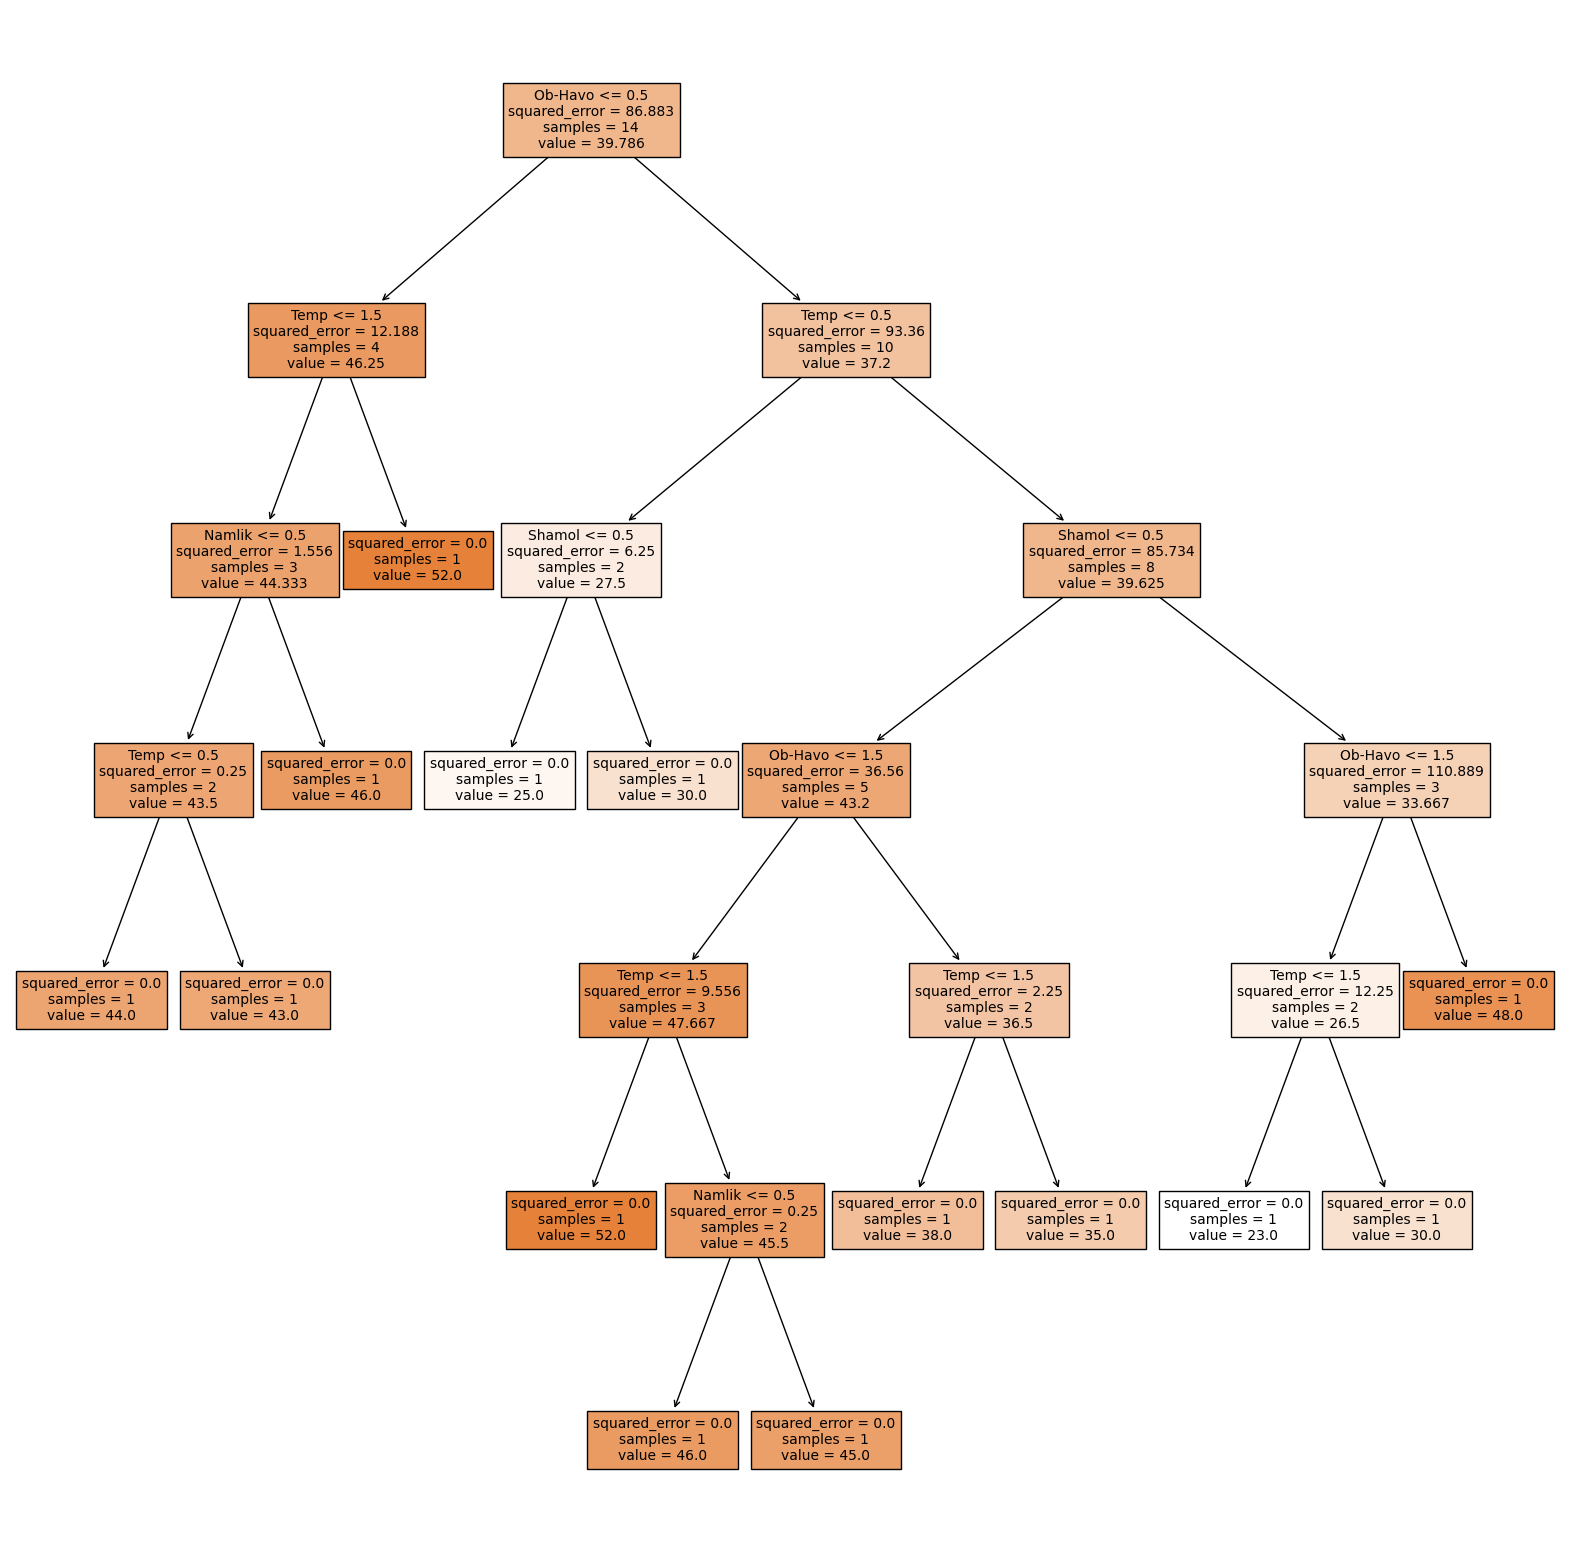

In [38]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, fontsize=10, feature_names=data.columns)
plt.show()

In [39]:
dt1 = DecisionTreeRegressor(min_samples_leaf=2,max_depth=4)

In [40]:
dt1.fit(x,data["Oyinchilar"])

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2)

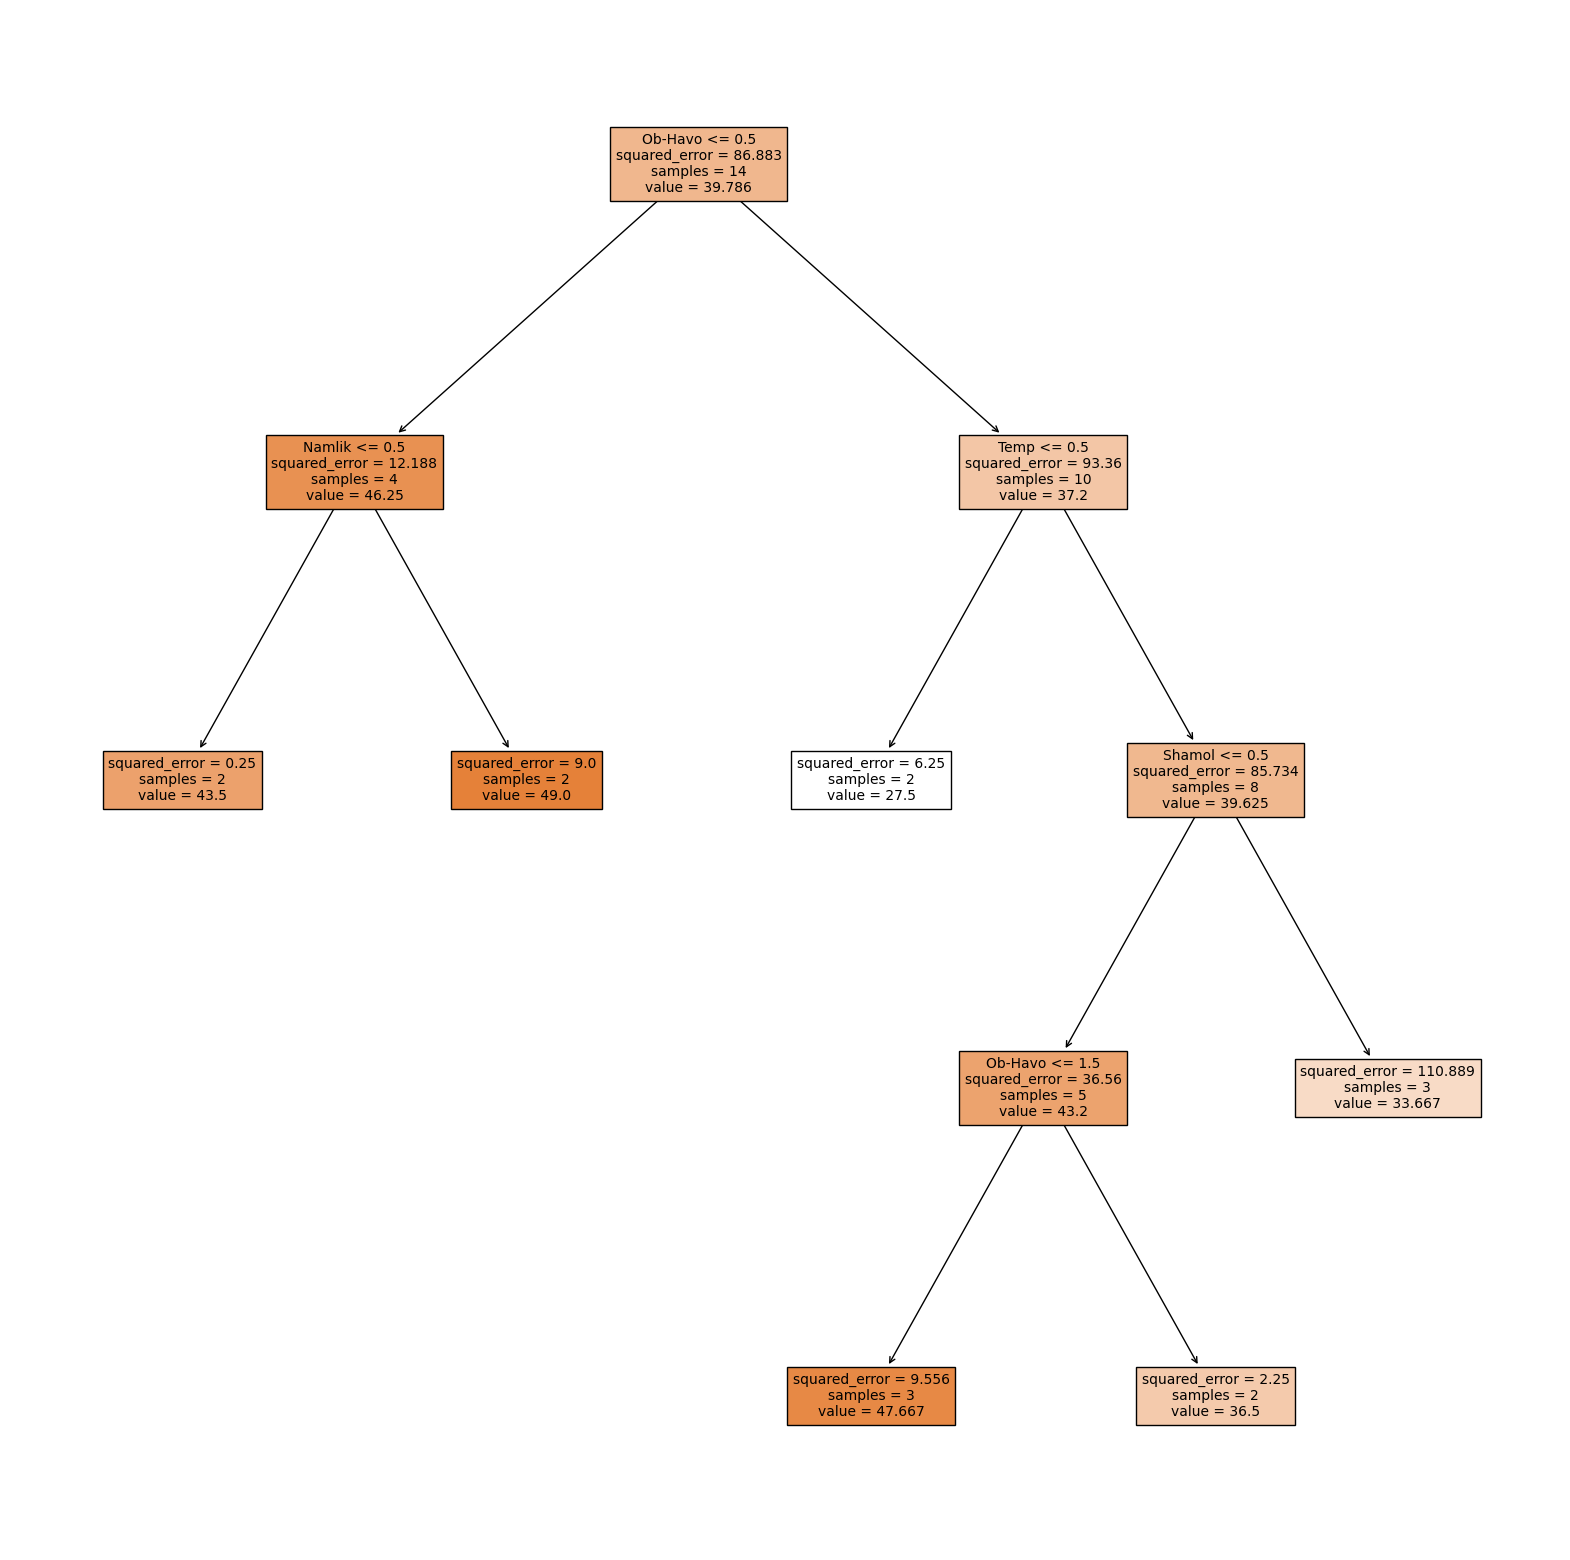

In [41]:
plt.figure(figsize=(20,20))
plot_tree(dt1, filled=True, fontsize=10, feature_names=data.columns)
plt.show()

# Decision Treeni hisoblash

In [42]:
# O'yinchilar ustunini o'zgaruvchiga yuklab, numpyga o'tkazib olish
uyinchi = data["Oyinchilar"]
uyinchi = uyinchi.to_numpy()
uyinchi

array([25, 30, 46, 45, 52, 23, 43, 35, 38, 46, 48, 52, 44, 30])

In [43]:
# Standart og'ish - bu o'rtacha kvadratik og'ishlarning o'rtacha kvadrat ildizi, ya'ni, bu erda .std = sqrt(mean(x))x = abs(a - a.mean())**2
uyinchi.std()

9.321086474291743

In [44]:
# myu
sum(uyinchi)/len(uyinchi)

39.785714285714285

In [45]:
# CV
9.321086474291743 / 39.785714285714285*100

23.428224531433468

### 1-qadam. To'rtta ustunning standart o'g'ishini hisoblaymiz

In [46]:
# 1. Datani ob-havo bo'yicha guruhlarga ajratamiz(Bulutli, Yomg'ir, Quyoshli)
data_obhavo = data.groupby("Ob-Havo")

# 2. Har bir guruhning standart og'ishi va har bir guruh nechta satrligini hisoblab chiqamiz. STD bo'yicha tartiblaymiz
data_obhavo = data_obhavo.agg(Std = ("Oyinchilar", lambda x: x.std(ddof=0)), Soni = ("Oyinchilar", np.count_nonzero)).sort_values("Std")
data_obhavo

,Std,Soni
Ob-Havo,,
Bulutli,3.491060,4
Yomg'ir,7.782031,5
Quyoshli,10.870143,5


In [47]:
# 1. Datani Temperatura bo'yicha guruhlarga ajratamiz(Yaxshi, Issiq, Salqin)
data_temp = data.groupby("Temp")

# 2. Har bir guruhning standart og'ishi va har bir guruh nechta satrligini hisoblab chiqamiz. STD bo'yicha tartiblaymiz
data_temp = data_temp.agg(Std = ("Oyinchilar", lambda x: x.std(ddof=0)), Soni = ("Oyinchilar", np.count_nonzero)).sort_values("Std")
data_temp

,Std,Soni
Temp,,
Yaxshi,7.652160,6
Issiq,8.954747,4
Salqin,10.511898,4


In [48]:
# 1. Datani namlik bo'yicha guruhlarga ajratamiz(Normal, Yuqori)
data_namlik = data.groupby("Namlik")

# 2. Har bir guruhning standart og'ishi va har bir guruh nechta satrligini hisoblab chiqamiz. STD bo'yicha tartiblaymiz
data_namlik = data_namlik.agg(Std = ("Oyinchilar", lambda x: x.std(ddof=0)), Soni = ("Oyinchilar", np.count_nonzero)).sort_values("Std")
data_namlik

,Std,Soni
Namlik,,
Normal,8.734169,7
Yuqori,9.363411,7


In [49]:
# 1. Datani shamol bo'yicha guruhlarga ajratamiz(True, False)
data_shamol = data.groupby("Shamol")

# 2. Har bir guruhning standart og'ishi va har bir guruh nechta satrligini hisoblab chiqamiz. STD bo'yicha tartiblaymiz
data_shamol = data_shamol.agg(Std = ("Oyinchilar", lambda x: x.std(ddof=0)), Soni = ("Oyinchilar", np.count_nonzero)).sort_values("Std")
data_shamol

,Std,Soni
Shamol,,
False,7.873016,8
True,10.593499,6


### 2-qadam.

* `Ob havo`

In [50]:
# Har bir guruh sonini, umumiy satrlar soniga bo'lib, har bir guruhning standart og'ishiga ko'paytiramiz 
# va O'yinchilar ustunining STD(9.321086474291743) dan ayiramiz
stdr_obhavo = uyinchi.std() - np.dot(data_obhavo["Soni"]/14,data_obhavo["Std"])
stdr_obhavo

1.6621503366302335

* Yuqoridagini qo'lda hisoblaymiz

In [51]:
# Bulutli 	3.491060 	4
# Yomg'ir 	7.782031 	5
# Quyoshli 	10.870143 	5
a = 4 / 14 * 3.491060
b = 5 / 14 * 7.782031
c = 5 / 14 * 10.870143
d = a + b + c
e = 9.321086474291743 - d
print(f"Bulutli: {a}\nYomg'ir: {b}\nQuyosh: {c}\nYig'indi: {d}\nSTD dan ayirma: {e}")

Bulutli: 0.9974457142857143
Yomg'ir: 2.7792967857142856
Quyosh: 3.8821939285714286
Yig'indi: 7.658936428571429
STD dan ayirma: 1.6621500457203142


* `Temperatura`

In [52]:
# Har bir guruh sonini, umumiy satrlar soniga bo'lib, har bir guruhning standart og'ishiga ko'paytiramiz 
# va O'yinchilar ustunining STD(9.321086474291743) dan ayiramiz
stdr_temp = uyinchi.std() - np.dot(data_temp["Soni"]/14,data_temp["Std"])
stdr_temp

0.4796905747633211

* Yuqoridagini qo'lda hisoblaymiz

In [53]:
# Yaxshi 	7.652160 	6
# Issiq 	8.954747 	4
# Salqin 	10.511898 	4
a = 6 / 14 * 7.652160
b = 4 / 14 * 8.954747
c = 4 / 14 * 10.511898
d = a + b + c
e = 9.321086474291743 - d
print(f"Yaxshi: {a}\nIssiq: {b}\nSalqin: {c}\nYig'indi: {d}\nSTD dan ayirma: {e}")

Yaxshi: 3.2794971428571427
Issiq: 2.5584991428571424
Salqin: 3.0033994285714285
Yig'indi: 8.841395714285714
STD dan ayirma: 0.4796907600060294


* `Namlik`

In [54]:
# Har bir guruh sonini, umumiy satrlar soniga bo'lib, har bir guruhning standart og'ishiga ko'paytiramiz 
# va O'yinchilar ustunining STD(9.321086474291743) dan ayiramiz
stdr_namlik = uyinchi.std() - np.dot(data_namlik["Soni"]/14,data_namlik["Std"])
stdr_namlik

0.272296195489826

* Yuqoridagini qo'lda hisoblaymiz

In [55]:
# Normal 	8.734169 	7
# Yuqori 	9.363411 	7
a = 7 / 14 * 8.734169
b = 7 / 14 * 9.363411
d = a + b
e = 9.321086474291743 - d
print(f"Normal: {a}\nYuqori: {b}\nYig'indi: {d}\nSTD dan ayirma: {e}")

Normal: 4.3670845
Yuqori: 4.6817055
Yig'indi: 9.04879
STD dan ayirma: 0.27229647429174264


* `Shamol`

In [56]:
# Har bir guruh sonini, umumiy satrlar soniga bo'lib, har bir guruhning standart og'ishiga ko'paytiramiz 
# va O'yinchilar ustunining STD(9.321086474291743) dan ayiramiz
stdr_shamol = uyinchi.std() - np.dot(data_shamol["Soni"]/14,data_shamol["Std"])
stdr_shamol

0.28214938055733185

* Yuqoridagini qo'lda hisoblaymiz

In [57]:
# False 	7.873016 	8
# True 	    10.593499 	6
a = 8 / 14 * 7.873016
b = 6 / 14 * 10.593499 
d = a + b
e = 9.321086474291743 - d
print(f"True: {a}\nFalse: {b}\nYig'indi: {d}\nSTD dan ayirma: {e}")

True: 4.498866285714286
False: 4.540070999999999
Yig'indi: 9.038937285714285
STD dan ayirma: 0.2821491885774581


### `Xulosa:` Yuqoridagi hisob-kitoblar(Ob-havo = 1.6621503366302335, Temperatura = 0.4796905747633211, Namlik = 0.272296195489826, Shamol = 0.28214938055733185)dan eng kattasi Ob-havo bo'lgani sababli daraxtning boshlanish qismi shundan boshlanadi

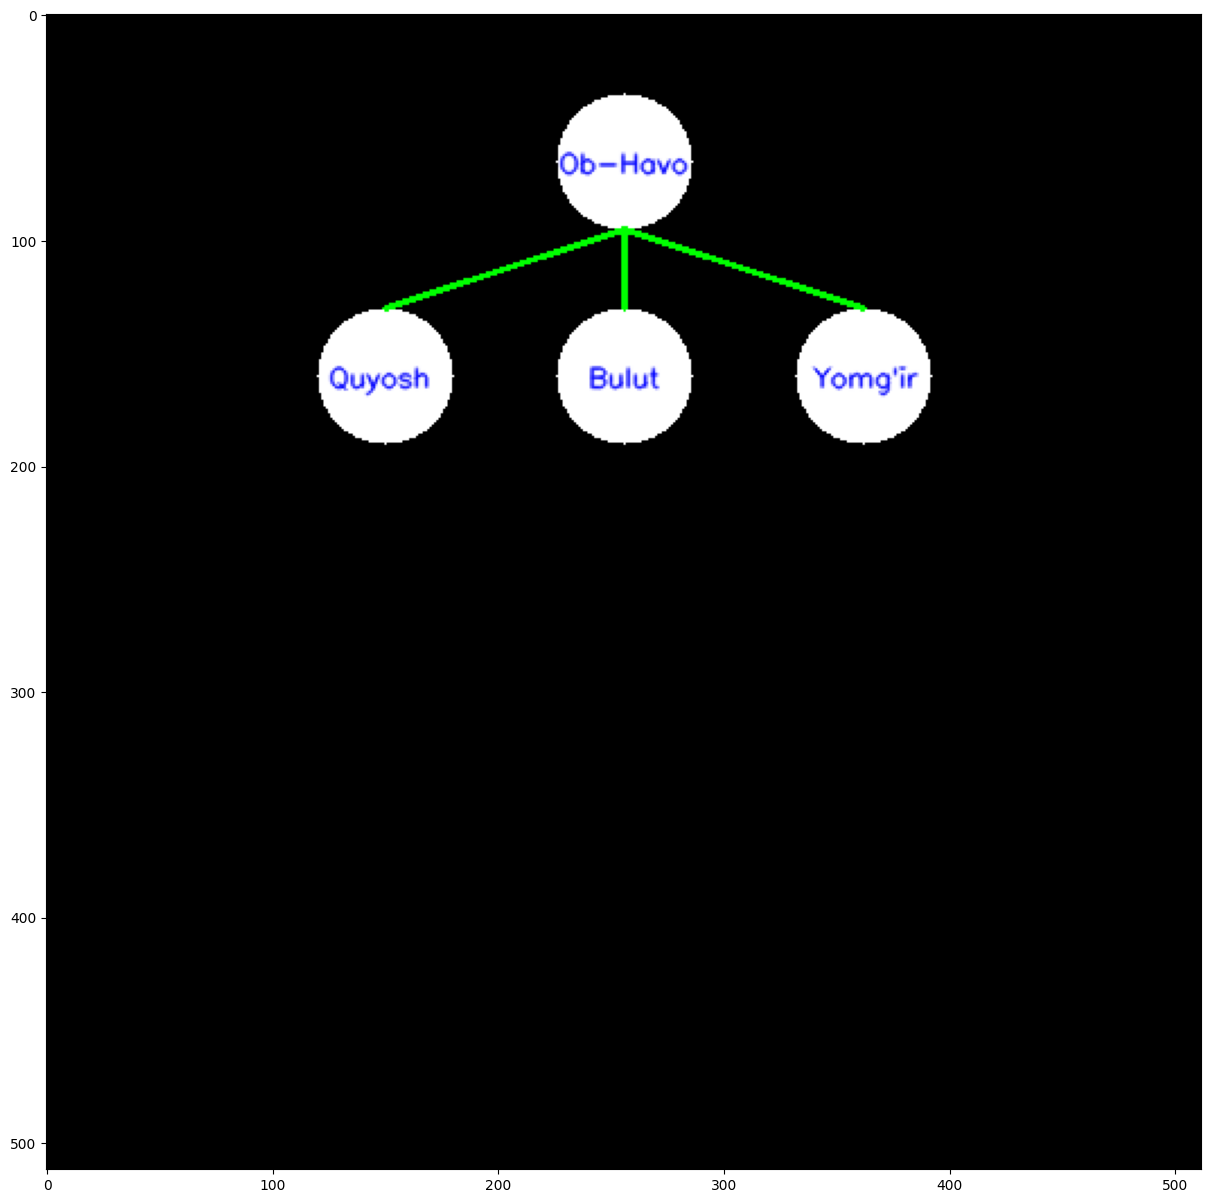

In [58]:
img = np.zeros((512,512,3), np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.circle(img,(256,65), 30, (255,255,255), -1)
cv2.putText(img,"Ob-Havo",(227,70), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.circle(img,(150,160), 30, (255,255,255), -1)
cv2.putText(img,"Quyosh",(125,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.circle(img,(256,160), 30, (255,255,255), -1)
cv2.putText(img,"Bulut",(240,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.circle(img,(362,160), 30, (255,255,255), -1)
cv2.putText(img,"Yomg'ir",(340,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(256,95),(150,130),(0,255,0),2)
cv2.line(img,(256,95),(256,130),(0,255,0),2)
cv2.line(img,(256,95),(362,130),(0,255,0),2)


plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

### 3-qadam

In [59]:
data[["Ob-Havo","Oyinchilar"]]

,Ob-Havo,Oyinchilar
0,Yomg'ir,25
1,Yomg'ir,30
2,Bulutli,46
3,Quyoshli,45
4,Quyoshli,52
5,Quyoshli,23
6,Bulutli,43
7,Yomg'ir,35
8,Yomg'ir,38
9,Quyoshli,46


In [60]:
# Bulutli - 4 - 185/4
# Yomg'ir - 5 - 176/5
# Quyoshli - 5 - 196/5

# Bulutli 	3.491060 	4
# Yomg'ir 	7.782031 	5
# Quyoshli 	10.870143 	5
b_ur = 185/4
y_ur = 176/5
q_ur = 196/5
bulut = (3.491060/b_ur)*100
yomgir = (7.782031/y_ur)*100
quyosh = (10.870143/q_ur)*100


* `Ob-Havo` ustuni asosiy bo'lganligi sababli uni guruhlarining qiymatlarini topib olamiz. CV = 10% dan, o'yinchi soni 3 dak kichik bo'lsa shohlanishni tugatamiz

In [61]:
data_obhavo["AVG"] = b_ur,y_ur,q_ur
data_obhavo["CV"] = bulut,yomgir,quyosh
data_obhavo

,Std,Soni,AVG,CV
Ob-Havo,,,,
Bulutli,3.491060,4,46.25,7.548238
Yomg'ir,7.782031,5,35.20,22.108043
Quyoshli,10.870143,5,39.20,27.729957


* Yuqorida bulutli qiymat CV ning qiymati 10% dan kichik shu sababli uni 46.25 natijada to'xtatamiz

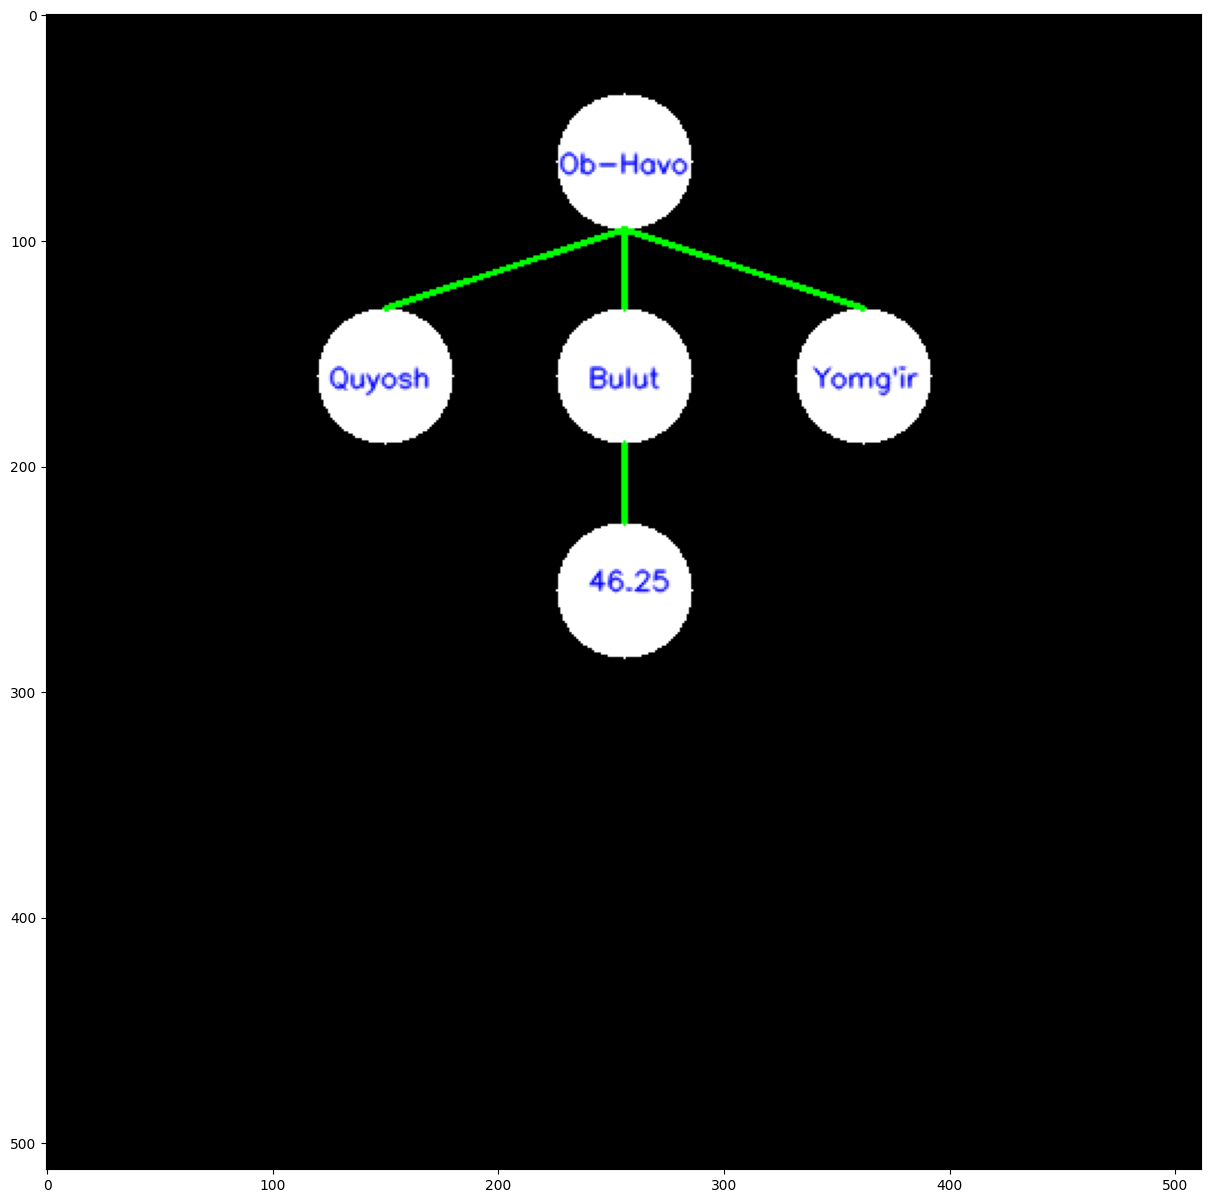

In [62]:
img = np.zeros((512,512,3), np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.circle(img,(256,65), 30, (255,255,255), -1)
cv2.putText(img,"Ob-Havo",(227,70), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.circle(img,(150,160), 30, (255,255,255), -1)
cv2.putText(img,"Quyosh",(125,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.circle(img,(256,160), 30, (255,255,255), -1)
cv2.putText(img,"Bulut",(240,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.circle(img,(362,160), 30, (255,255,255), -1)
cv2.putText(img,"Yomg'ir",(340,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.circle(img,(256,255), 30, (255,255,255), -1)
cv2.putText(img,"46.25",(240,255), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.line(img,(256,95),(150,130),(0,255,0),2)
cv2.line(img,(256,95),(256,130),(0,255,0),2)
cv2.line(img,(256,95),(362,130),(0,255,0),2)

cv2.line(img,(256,190),(256,225),(0,255,0),2)


plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

### 4-qadam. Endi ob-havo quyoshli bo'lganda yuqoridagilarni qayta hisoblaymiz

In [63]:
data_quyosh = data[data["Ob-Havo"]=="Quyoshli"]
data_quyosh

,Ob-Havo,Temp,Namlik,Shamol,Oyinchilar
3,Quyoshli,Yaxshi,Yuqori,False,45
4,Quyoshli,Salqin,Normal,False,52
5,Quyoshli,Salqin,Normal,True,23
9,Quyoshli,Yaxshi,Normal,False,46
13,Quyoshli,Yaxshi,Yuqori,True,30


In [64]:
uyinchi_quyosh = data_quyosh["Oyinchilar"]
uyinchi_quyosh = uyinchi_quyosh.to_numpy()
uyinchi_quyosh

array([45, 52, 23, 46, 30])

In [65]:
uyinchi_quyosh.std()

10.870142593360953

In [66]:
# 1. Datani Temperatura bo'yicha guruhlarga ajratamiz(Yaxshi, Salqin)
data_temp_quyosh = data_quyosh.groupby("Temp")

# 2. Har bir guruhning standart og'ishi va har bir guruh nechta satrligini hisoblab chiqamiz. STD bo'yicha tartiblaymiz
data_temp_quyosh = data_temp_quyosh.agg(Std = ("Oyinchilar", lambda x: x.std(ddof=0)), Soni = ("Oyinchilar", np.count_nonzero)).sort_values("Std")
data_temp_quyosh

,Std,Soni
Temp,,
Yaxshi,7.318166,3
Salqin,14.500000,2


In [67]:
# 1. Datani Temperatura bo'yicha guruhlarga ajratamiz(Normal, Yuqori)
data_namlik_quyosh = data_quyosh.groupby("Namlik")

# 2. Har bir guruhning standart og'ishi va har bir guruh nechta satrligini hisoblab chiqamiz. STD bo'yicha tartiblaymiz
data_namlik_quyosh = data_namlik_quyosh.agg(Std = ("Oyinchilar", lambda x: x.std(ddof=0)), Soni = ("Oyinchilar", np.count_nonzero)).sort_values("Std")
data_namlik_quyosh

,Std,Soni
Namlik,,
Yuqori,7.500000,2
Normal,12.498889,3


In [68]:
# 1. Datani Temperatura bo'yicha guruhlarga ajratamiz(True,False)
data_shamol_quyosh = data_quyosh.groupby("Shamol")

# 2. Har bir guruhning standart og'ishi va har bir guruh nechta satrligini hisoblab chiqamiz. STD bo'yicha tartiblaymiz
data_shamol_quyosh = data_shamol_quyosh.agg(Std = ("Oyinchilar", lambda x: x.std(ddof=0)), Soni = ("Oyinchilar", np.count_nonzero)).sort_values("Std")
data_shamol_quyosh

,Std,Soni
Shamol,,
False,3.091206,3
True,3.500000,2


### Endi standart og'ishni topamiz

`Temperatura`

In [69]:
# Ob-havo quyoshli bo'lganda har bir guruh sonini, umumiy satrlar soniga bo'lib, har bir guruhning standart og'ishiga 
# ko'paytiramiz va O'yinchilar ustunining STD(10.870142593360953) dan ayiramiz
stdr_temp_quyosh = uyinchi_quyosh.std() - np.dot(data_temp_quyosh["Soni"]/5,data_temp_quyosh["Std"])
stdr_temp_quyosh

0.6792429133409215

* Yuqoridagini qo'lda hisoblaymiz

In [70]:
# Yaxshi 	7.318166 	3
# Salqin 	14.500000 	2

a = 3 / 5 * 7.318166
b = 2 / 5 * 14.500000
d = a + b
e = 10.870142593360953 - d
print(f"Yaxshi: {a}\nSalqin: {b}\nYig'indi: {d}\nSTD dan ayirma: {e}")

Yaxshi: 4.3908996
Salqin: 5.800000000000001
Yig'indi: 10.190899600000002
STD dan ayirma: 0.6792429933609512


* `Namlik`

In [71]:
# Ob-havo quyoshli bo'lganda har bir guruh sonini, umumiy satrlar soniga bo'lib, har bir guruhning standart og'ishiga 
# ko'paytiramiz va O'yinchilar ustunining STD(10.870142593360953) dan ayiramiz
stdr_namlik_quyosh = uyinchi_quyosh.std() - np.dot(data_namlik_quyosh["Soni"]/5,data_namlik_quyosh["Std"])
stdr_namlik_quyosh

0.37080928965988313

* Yuqoridagini qo'lda hisoblaymiz

In [72]:
# Yuqori 	7.500000 	2
# Normal 	12.498889 	3
a = 2 / 5 * 7.500000
b = 3 / 5 * 12.498889
d = a + b
e = 10.870142593360953 - d
print(f"Normal: {a}\nYuqori: {b}\nYig'indi: {d}\nSTD dan ayirma: {e}")

Normal: 3.0
Yuqori: 7.499333399999999
Yig'indi: 10.4993334
STD dan ayirma: 0.3708091933609534


* `Shamol`

In [73]:
# Ob-havo quyoshli bo'lganda har bir guruh sonini, umumiy satrlar soniga bo'lib, har bir guruhning standart og'ishiga 
# ko'paytiramiz va O'yinchilar ustunining STD(10.870142593360953) dan ayiramiz
stdr_shamol_quyosh = uyinchi_quyosh.std() - np.dot(data_shamol_quyosh["Soni"]/5,data_shamol_quyosh["Std"])
stdr_shamol_quyosh

7.615418894261811

* Yuqoridagini qo'lda hisoblaymiz

In [74]:
# False 	3.091206 	3
# True 	    3.500000 	2
a = 3 / 5 * 3.091206
b = 2 / 5 * 3.500000 
d = a + b
e = 10.870142593360953 - d
print(f"True: {a}\nFalse: {b}\nYig'indi: {d}\nSTD dan ayirma: {e}")

True: 1.8547236
False: 1.4000000000000001
Yig'indi: 3.2547236
STD dan ayirma: 7.615418993360953


### `Xulosa:` Yuqoridagi hisob-kitoblar(Temperatura = 0.6792429133409215, Namlik = 0.37080928965988313, Shamol = 7.615418894261811)dan eng kattasi Shamol bo'lgani sababli daraxtning keyingi qismi shu bo'ladi

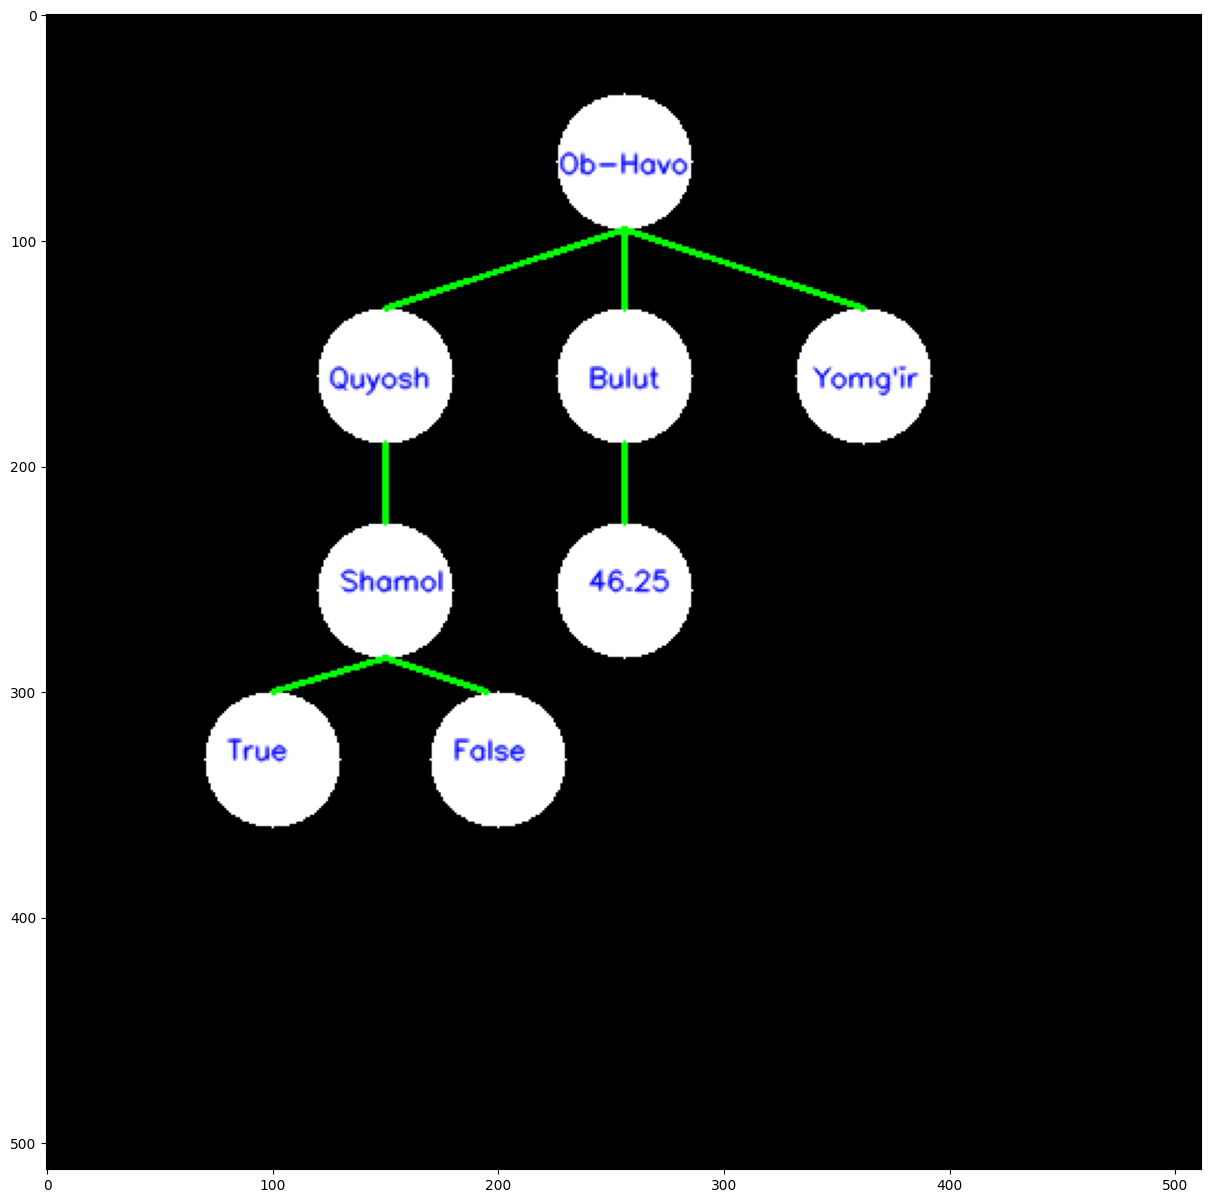

In [75]:
img = np.zeros((512,512,3), np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.circle(img,(256,65), 30, (255,255,255), -1)
cv2.putText(img,"Ob-Havo",(227,70), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(150,160), 30, (255,255,255), -1)
cv2.putText(img,"Quyosh",(125,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(256,160), 30, (255,255,255), -1)
cv2.putText(img,"Bulut",(240,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(362,160), 30, (255,255,255), -1)
cv2.putText(img,"Yomg'ir",(340,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(256,255), 30, (255,255,255), -1)
cv2.putText(img,"46.25",(240,255), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(150,255), 30, (255,255,255), -1)
cv2.putText(img,"Shamol",(130,255), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(100,330), 30, (255,255,255), -1)
cv2.putText(img,"True",(80,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(200,330), 30, (255,255,255), -1)
cv2.putText(img,"False",(180,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.line(img,(256,95),(150,130),(0,255,0),2)
cv2.line(img,(256,95),(256,130),(0,255,0),2)
cv2.line(img,(256,95),(362,130),(0,255,0),2)

cv2.line(img,(150,190),(150,225),(0,255,0),2)
cv2.line(img,(150,285),(100,300),(0,255,0),2)
cv2.line(img,(150,285),(195,300),(0,255,0),2)
cv2.line(img,(256,190),(256,225),(0,255,0),2)


plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

### 5-qadam

In [76]:
data_quyosh[["Shamol","Oyinchilar"]]

,Shamol,Oyinchilar
3,False,45
4,False,52
5,True,23
9,False,46
13,True,30


In [77]:
# False- 3 - 143/3
# True - 2 - 53/2

# False 	3.091206 	3
# True 	    3.500000 	2

fa_ur = 143/3
tr_ur = 53/2
false = (3.091206/fa_ur)*100
true = (3.500000/tr_ur)*100

* `Shamol` ustuni asosiy bo'lganligi sababli uni guruhlarining qiymatlarini topib olamiz. CV = 10% dan, o'yinchi soni 3 dak kichik bo'lsa shohlanishni tugatamiz

In [78]:
data_shamol_quyosh["AVG"] = fa_ur,tr_ur
data_shamol_quyosh["CV"] = false, true
data_shamol_quyosh

,Std,Soni,AVG,CV
Shamol,,,,
False,3.091206,3,47.666667,6.485048
True,3.500000,2,26.500000,13.207547


* Yuqorida Falsening qiymati CV ning qiymati 10% dan kichik, Truening o'yinchilar soni 3 dan kichik shu sababli False=47.666667 va True=26.5 natijada to'xtatamiz

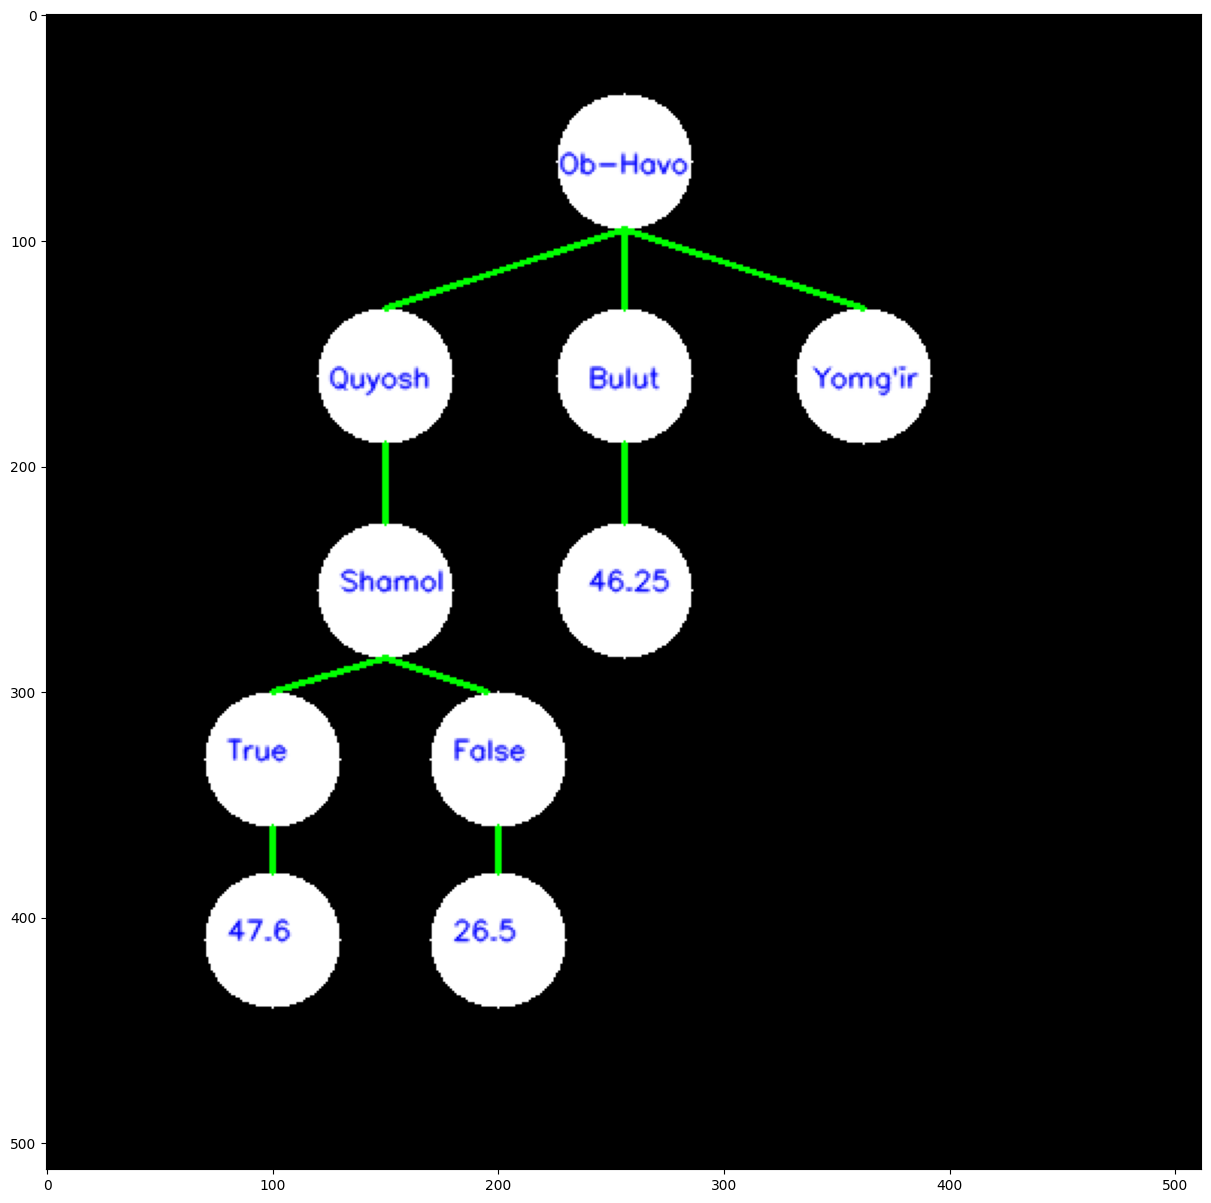

In [79]:
img = np.zeros((512,512,3), np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.circle(img,(256,65), 30, (255,255,255), -1)
cv2.putText(img,"Ob-Havo",(227,70), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(150,160), 30, (255,255,255), -1)
cv2.putText(img,"Quyosh",(125,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(256,160), 30, (255,255,255), -1)
cv2.putText(img,"Bulut",(240,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(362,160), 30, (255,255,255), -1)
cv2.putText(img,"Yomg'ir",(340,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(256,255), 30, (255,255,255), -1)
cv2.putText(img,"46.25",(240,255), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(150,255), 30, (255,255,255), -1)
cv2.putText(img,"Shamol",(130,255), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(100,330), 30, (255,255,255), -1)
cv2.putText(img,"True",(80,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(100,410), 30, (255,255,255), -1)
cv2.putText(img,"47.6",(80,410), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(200,330), 30, (255,255,255), -1)
cv2.putText(img,"False",(180,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(200,410), 30, (255,255,255), -1)
cv2.putText(img,"26.5",(180,410), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.line(img,(256,95),(150,130),(0,255,0),2)
cv2.line(img,(256,95),(256,130),(0,255,0),2)
cv2.line(img,(256,95),(362,130),(0,255,0),2)

cv2.line(img,(150,190),(150,225),(0,255,0),2)
cv2.line(img,(150,285),(100,300),(0,255,0),2)
cv2.line(img,(150,285),(195,300),(0,255,0),2)
cv2.line(img,(256,190),(256,225),(0,255,0),2)

cv2.line(img,(100,360),(100,380),(0,255,0),2)
cv2.line(img,(200,360),(200,380),(0,255,0),2)


plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

`*****************************************************************************************************************************`

### 6-qadam. Endi ob-havo yomg'irli bo'lganda yuqoridagilarni qayta hisoblaymiz

In [80]:
data_yomgir = data[data["Ob-Havo"]=="Yomg'ir"]
data_yomgir

,Ob-Havo,Temp,Namlik,Shamol,Oyinchilar
0,Yomg'ir,Issiq,Yuqori,False,25
1,Yomg'ir,Issiq,Yuqori,True,30
7,Yomg'ir,Yaxshi,Yuqori,False,35
8,Yomg'ir,Salqin,Normal,False,38
10,Yomg'ir,Yaxshi,Normal,True,48


In [81]:
uyinchi_yomgir = data_yomgir["Oyinchilar"]
uyinchi_yomgir = uyinchi_yomgir.to_numpy()
uyinchi_yomgir

array([25, 30, 35, 38, 48])

In [82]:
uyinchi_yomgir.std()

7.782030583337487

In [83]:
# 1. Datani Temperatura bo'yicha guruhlarga ajratamiz(Yaxshi, Issiq, Salqin)
data_temp_yomgir = data_yomgir.groupby("Temp")

# 2. Har bir guruhning standart og'ishi va har bir guruh nechta satrligini hisoblab chiqamiz. STD bo'yicha tartiblaymiz
data_temp_yomgir = data_temp_yomgir.agg(Std = ("Oyinchilar", lambda x: x.std(ddof=0)), Soni = ("Oyinchilar", np.count_nonzero)).sort_values("Std")
data_temp_yomgir

,Std,Soni
Temp,,
Salqin,0.0,1
Issiq,2.5,2
Yaxshi,6.5,2


In [84]:
# 1. Datani Temperatura bo'yicha guruhlarga ajratamiz(Normal, Yuqori)
data_namlik_yomgir = data_yomgir.groupby("Namlik")

# 2. Har bir guruhning standart og'ishi va har bir guruh nechta satrligini hisoblab chiqamiz. STD bo'yicha tartiblaymiz
data_namlik_yomgir = data_namlik_yomgir.agg(Std = ("Oyinchilar", lambda x: x.std(ddof=0)), Soni = ("Oyinchilar", np.count_nonzero)).sort_values("Std")
data_namlik_yomgir

,Std,Soni
Namlik,,
Yuqori,4.082483,3
Normal,5.000000,2


In [85]:
# 1. Datani Temperatura bo'yicha guruhlarga ajratamiz(True,False)
data_shamol_yomgir = data_yomgir.groupby("Shamol")

# 2. Har bir guruhning standart og'ishi va har bir guruh nechta satrligini hisoblab chiqamiz. STD bo'yicha tartiblaymiz
data_shamol_yomgir = data_shamol_yomgir.agg(Std = ("Oyinchilar", lambda x: x.std(ddof=0)), Soni = ("Oyinchilar", np.count_nonzero)).sort_values("Std")
data_shamol_yomgir

,Std,Soni
Shamol,,
False,5.557777,3
True,9.000000,2


### Endi standart og'ishni topamiz

`Temperatura`

In [86]:
# Ob-havo yomg'irli bo'lganda har bir guruh sonini, umumiy satrlar soniga bo'lib, har bir guruhning standart og'ishiga 
# ko'paytiramiz va O'yinchilar ustunining STD(7.782030583337487) dan ayiramiz
stdr_temp_yomgir = uyinchi_yomgir.std() - np.dot(data_temp_yomgir["Soni"]/5,data_temp_yomgir["Std"])
stdr_temp_yomgir

4.182030583337488

* Yuqoridagini qo'lda hisoblaymiz

In [87]:
# Salqin 	0.0 	1
# Issiq 	2.5 	2
# Yaxshi 	6.5 	2

a = 1 / 5 * 0.0
b = 2 / 5 * 2.5
c = 2 / 5 * 6.5
d = a + b + c
e = 7.782030583337487 - d
print(f"Salqin: {a}\nIssiq: {b}\nYaxshi: {c}\nYig'indi: {d}\nSTD dan ayirma: {e}")

Salqin: 0.0
Issiq: 1.0
Yaxshi: 2.6
Yig'indi: 3.6
STD dan ayirma: 4.182030583337488


* `Namlik`

In [88]:
# Ob-havo yomg'irli bo'lganda har bir guruh sonini, umumiy satrlar soniga bo'lib, har bir guruhning standart og'ishiga 
# ko'paytiramiz va O'yinchilar ustunining STD(7.782030583337487) dan ayiramiz
stdr_namlik_yomgir = uyinchi_yomgir.std() - np.dot(data_namlik_yomgir["Soni"]/5,data_namlik_yomgir["Std"])
stdr_namlik_yomgir

3.3325408405543087

* Yuqoridagini qo'lda hisoblaymiz

In [89]:
# Yuqori 	4.082483 	3
# Normal 	5.000000 	2

a = 2 / 5 * 5.0
b = 3 / 5 * 4.082483
d = a + b
e = 7.782030583337487 - d
print(f"Normal: {a}\nYuqori: {b}\nYig'indi: {d}\nSTD dan ayirma: {e}")

Normal: 2.0
Yuqori: 2.4494898
Yig'indi: 4.4494898
STD dan ayirma: 3.332540783337487


* `Shamol`

In [90]:
# Ob-havo yomg'irli bo'lganda har bir guruh sonini, umumiy satrlar soniga bo'lib, har bir guruhning standart og'ishiga 
# ko'paytiramiz va O'yinchilar ustunining STD(7.782030583337487) dan ayiramiz
stdr_shamol_yomgir = uyinchi_yomgir.std() - np.dot(data_shamol_yomgir["Soni"]/5,data_shamol_yomgir["Std"])
stdr_shamol_yomgir

0.8473641832308747

* Yuqoridagini qo'lda hisoblaymiz

In [91]:
# False 	5.557777 	3
# True 	    9.000000 	2

a = 3 / 5 * 5.557777
b = 2 / 5 * 9.000000 
d = a + b
e = 7.782030583337487 - d
print(f"True: {a}\nFalse: {b}\nYig'indi: {d}\nSTD dan ayirma: {e}")

True: 3.3346661999999996
False: 3.6
Yig'indi: 6.9346662
STD dan ayirma: 0.8473643833374878


### `Xulosa:` Yuqoridagi hisob-kitoblar(Temperatura = 4.182030583337488, Namlik = 3.3325408405543087, Shamol = 0.8473641832308747)dan eng kattasi Temperatura bo'lgani sababli daraxtning keyingi qismi shu bo'ladi

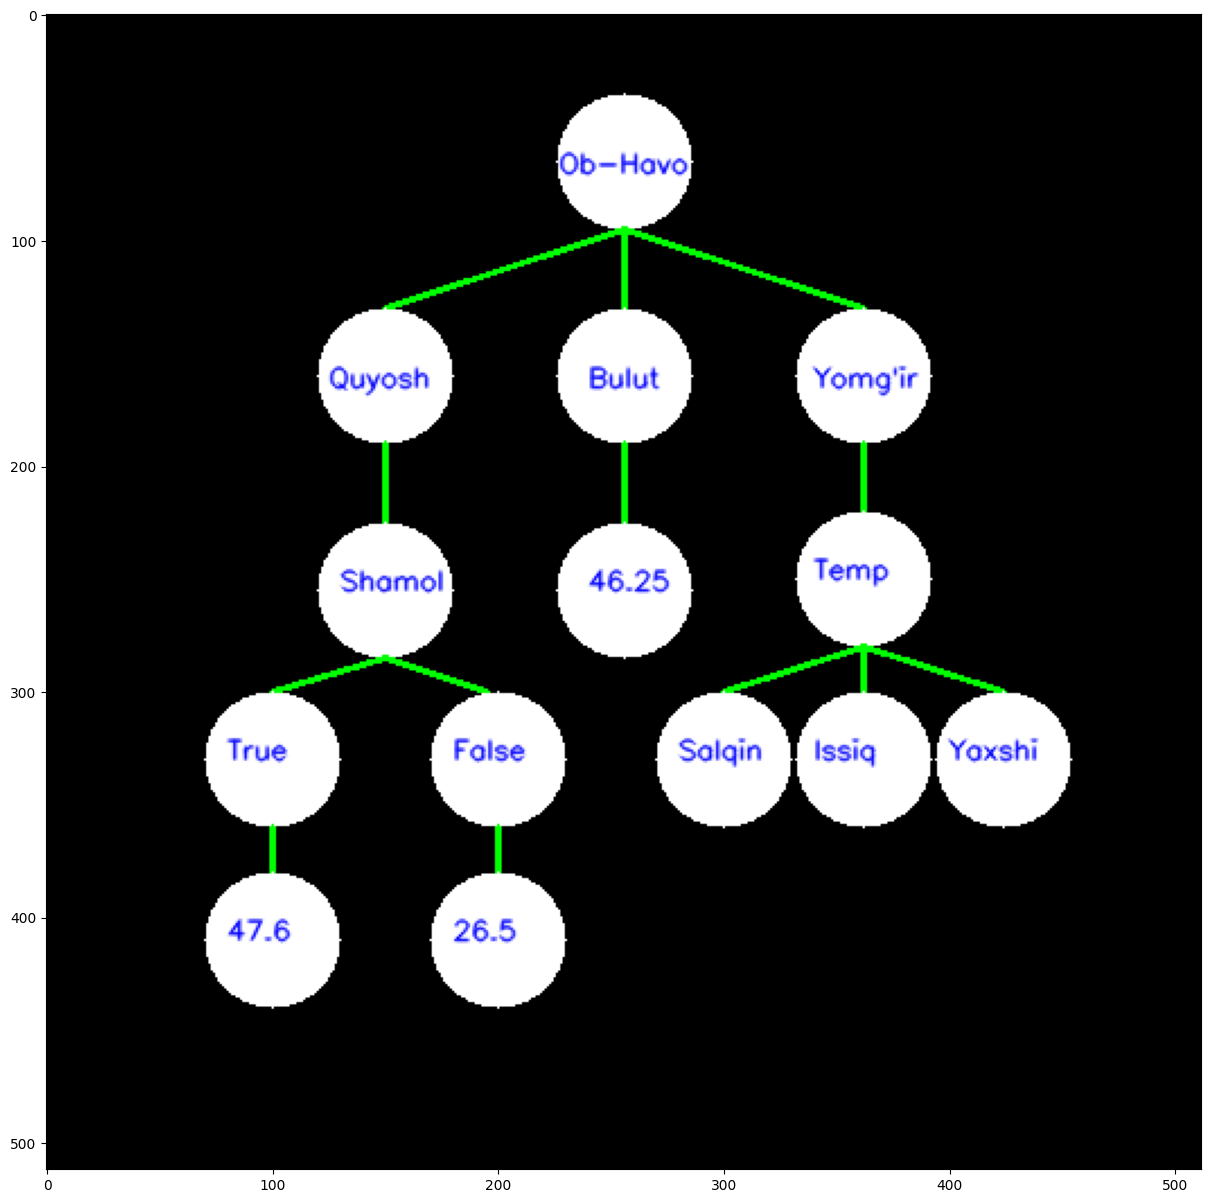

In [92]:
img = np.zeros((512,512,3), np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.circle(img,(256,65), 30, (255,255,255), -1)
cv2.putText(img,"Ob-Havo",(227,70), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(256,95),(150,130),(0,255,0),2)
cv2.line(img,(256,95),(256,130),(0,255,0),2)
cv2.line(img,(256,95),(362,130),(0,255,0),2)

cv2.circle(img,(150,160), 30, (255,255,255), -1)
cv2.putText(img,"Quyosh",(125,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(150,190),(150,225),(0,255,0),2)

cv2.circle(img,(256,160), 30, (255,255,255), -1)
cv2.putText(img,"Bulut",(240,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(256,190),(256,225),(0,255,0),2)

cv2.circle(img,(362,160), 30, (255,255,255), -1)
cv2.putText(img,"Yomg'ir",(340,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(362,190),(362,220),(0,255,0),2)

cv2.circle(img,(362,250), 30, (255,255,255), -1)
cv2.putText(img,"Temp",(340,250), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(362,280),(300,300),(0,255,0),2)
cv2.line(img,(362,280),(362,300),(0,255,0),2)
cv2.line(img,(362,280),(424,300),(0,255,0),2)

cv2.circle(img,(300,330), 30, (255,255,255), -1)
cv2.putText(img,"Salqin",(280,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(362,330), 30, (255,255,255), -1)
cv2.putText(img,"Issiq",(340,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(424,330), 30, (255,255,255), -1)
cv2.putText(img,"Yaxshi",(400,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)


cv2.circle(img,(256,255), 30, (255,255,255), -1)
cv2.putText(img,"46.25",(240,255), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(150,255), 30, (255,255,255), -1)
cv2.putText(img,"Shamol",(130,255), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(150,285),(100,300),(0,255,0),2)
cv2.line(img,(150,285),(195,300),(0,255,0),2)

cv2.circle(img,(100,330), 30, (255,255,255), -1)
cv2.putText(img,"True",(80,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(100,360),(100,380),(0,255,0),2)

cv2.circle(img,(100,410), 30, (255,255,255), -1)
cv2.putText(img,"47.6",(80,410), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(200,330), 30, (255,255,255), -1)
cv2.putText(img,"False",(180,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(200,360),(200,380),(0,255,0),2)

cv2.circle(img,(200,410), 30, (255,255,255), -1)
cv2.putText(img,"26.5",(180,410), font, 0.4,(0,0,255),1,cv2.LINE_AA)

plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

### 7-qadam

In [93]:
data_yomgir[["Temp","Oyinchilar"]]

,Temp,Oyinchilar
0,Issiq,25
1,Issiq,30
7,Yaxshi,35
8,Salqin,38
10,Yaxshi,48


In [94]:
# Salqin - 1 - 38/1
# Issiq  - 2 - 55/2
# Yaxshi - 2 - 82/2

# Salqin 	0.0 	1
# Issiq 	2.5 	2
# Yaxshi 	6.5 	2

sa_ur = 38/1
is_ur = 55/2
yax_ur = 82/2

salqin = (0.0/sa_ur)*100
issiq = (2.5/is_ur)*100
yaxshi = (6.5/yax_ur)*100

* `Shamol` ustuni asosiy bo'lganligi sababli uni guruhlarining qiymatlarini topib olamiz. CV = 10% dan, o'yinchi soni 3 dak kichik bo'lsa shohlanishni tugatamiz

In [95]:
data_temp_yomgir["AVG"] = sa_ur,is_ur, yax_ur
data_temp_yomgir["CV"] = salqin,issiq,yaxshi
data_temp_yomgir

,Std,Soni,AVG,CV
Temp,,,,
Salqin,0.0,1,38.0,0.000000
Issiq,2.5,2,27.5,9.090909
Yaxshi,6.5,2,41.0,15.853659


* Yuqorida Salqin va Issiqning qiymati CV ning qiymati 10% dan kichik, barchasida o'yinchilar soni 3 dan kichik shu sababli Salqin=38, Issiq=27.5 va Yaxshi=41 natijada to'xtatamiz

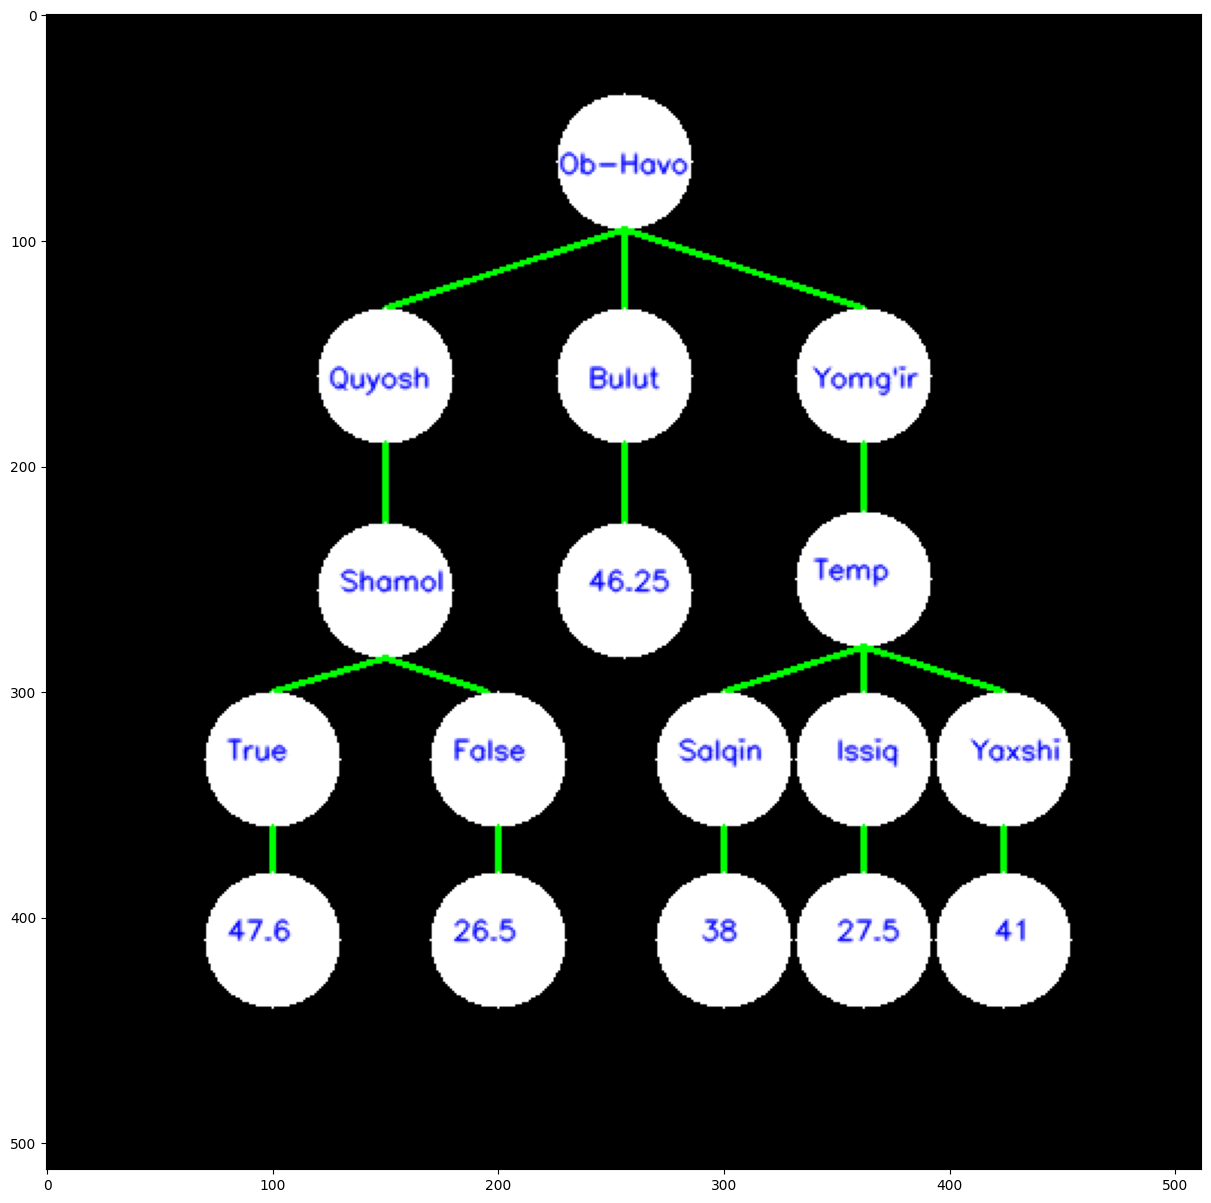

In [96]:
img = np.zeros((512,512,3), np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.circle(img,(256,65), 30, (255,255,255), -1)
cv2.putText(img,"Ob-Havo",(227,70), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(256,95),(150,130),(0,255,0),2)
cv2.line(img,(256,95),(256,130),(0,255,0),2)
cv2.line(img,(256,95),(362,130),(0,255,0),2)

cv2.circle(img,(150,160), 30, (255,255,255), -1)
cv2.putText(img,"Quyosh",(125,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(150,190),(150,225),(0,255,0),2)

cv2.circle(img,(256,160), 30, (255,255,255), -1)
cv2.putText(img,"Bulut",(240,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(256,190),(256,225),(0,255,0),2)

cv2.circle(img,(362,160), 30, (255,255,255), -1)
cv2.putText(img,"Yomg'ir",(340,165), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(362,190),(362,220),(0,255,0),2)

cv2.circle(img,(362,250), 30, (255,255,255), -1)
cv2.putText(img,"Temp",(340,250), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(362,280),(300,300),(0,255,0),2)
cv2.line(img,(362,280),(362,300),(0,255,0),2)
cv2.line(img,(362,280),(424,300),(0,255,0),2)

cv2.circle(img,(300,330), 30, (255,255,255), -1)
cv2.putText(img,"Salqin",(280,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(300,360),(300,380),(0,255,0),2)

cv2.circle(img,(300,410), 30, (255,255,255), -1)
cv2.putText(img,"38",(290,410), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(362,330), 30, (255,255,255), -1)
cv2.putText(img,"Issiq",(350,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(362,360),(362,380),(0,255,0),2)

cv2.circle(img,(362,410), 30, (255,255,255), -1)
cv2.putText(img,"27.5",(350,410), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(424,330), 30, (255,255,255), -1)
cv2.putText(img,"Yaxshi",(410,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(424,360),(424,380),(0,255,0),2)

cv2.circle(img,(424,410), 30, (255,255,255), -1)
cv2.putText(img,"41",(420,410), font, 0.4,(0,0,255),1,cv2.LINE_AA)


cv2.circle(img,(256,255), 30, (255,255,255), -1)
cv2.putText(img,"46.25",(240,255), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(150,255), 30, (255,255,255), -1)
cv2.putText(img,"Shamol",(130,255), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(150,285),(100,300),(0,255,0),2)
cv2.line(img,(150,285),(195,300),(0,255,0),2)

cv2.circle(img,(100,330), 30, (255,255,255), -1)
cv2.putText(img,"True",(80,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(100,360),(100,380),(0,255,0),2)

cv2.circle(img,(100,410), 30, (255,255,255), -1)
cv2.putText(img,"47.6",(80,410), font, 0.4,(0,0,255),1,cv2.LINE_AA)

cv2.circle(img,(200,330), 30, (255,255,255), -1)
cv2.putText(img,"False",(180,330), font, 0.4,(0,0,255),1,cv2.LINE_AA)
cv2.line(img,(200,360),(200,380),(0,255,0),2)

cv2.circle(img,(200,410), 30, (255,255,255), -1)
cv2.putText(img,"26.5",(180,410), font, 0.4,(0,0,255),1,cv2.LINE_AA)

plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()